In [4]:
try:
    %load_ext google.colab.data_table
except Exception as e:
    pass
import json
import pandas as pd
from matplotlib import pyplot as plt
from time import sleep
try:
    %matplotlib inline
except Exception as e:
    pass


In [109]:
try:
    from google.colab import files
    uploaded = files.upload()
    data:dict = json.loads(uploaded['data-trunc.json'])
except Exception as e:
    import util
    with open('./data.json') as fp:
        # 500ms~
        data:dict = util.partial_json(fp,objs=50)

In [110]:
data

{'1577836803078': {'assetA': {'ask': 7189, 'bid': 7188.89},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806371': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806459': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806474': {'assetA': {'ask': 7190.43, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806575': {'assetA': {'ask': 7190.39, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807242': {'assetA': {'ask': 7190.33, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807344': {'assetA': {'ask': 7190.25, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807444': {'assetA': {'ask': 7190.21, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807545': {'assetA': {'ask': 7190.12, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807649': {'assetA': 

In [6]:
try:
    import util
    get_chunks = util.get_chunks
    simulate_stream = util.simulate_stream
except:
    def get_chunks(data, chunksize=10000, chunk_count=None):
        chunks = []
        chunk = dict()
        count = 0
        for i, (key, value) in enumerate(data.items()):
            if i and i % chunksize == 0:
                chunks.append(chunk)
                count += 1
                chunk = dict()
                if chunk_count and chunk_count == count:
                    return chunks
            chunk[key] = value
        return chunks



    def simulate_stream(data):
        """Yields a DataFrame"""
        keys = list(data.keys())
        for i, (key, value) in enumerate(data.items()):
            try:
                yield pd.DataFrame({key: value})
                nextkey = int(keys[i + 1])
                diff_sec = (nextkey - int(key)) / 1000
                sleep(diff_sec)
            except IndexError:
                # end of file
                return

In [ ]:
chunk = get_chunks(data, chunksize=100, chunk_count=1)[0]

In [8]:
chunkiter = iter(chunk)
key0 = int(next(chunkiter))
timestamps = []
assetA_asks = []
assetB_asks = []
assetA_bids = []
assetB_bids = []
for i, (k, v) in enumerate(chunk.items()):
    assetA_ask = v['assetA']['ask']
    assetB_ask = v['assetB']['ask']
    assetA_bid = v['assetA']['bid']
    assetB_bid = v['assetB']['bid']
    norm_key = int(k) - key0
    timestamps.append(norm_key)
    assetA_asks.append(assetA_ask)
    assetB_asks.append(assetB_ask)
    assetA_bids.append(assetA_bid)
    assetB_bids.append(assetB_bid)

In [9]:
timestamps[:7]

[0, 3293, 3381, 3396, 3497, 4164, 4266]

In [10]:
assetA_asks[:7]

[7189, 7190.09, 7190.09, 7190.43, 7190.39, 7190.33, 7190.25]

In [11]:
assetA_bids[:7]

[7188.89, 7190.05, 7190.05, 7190.05, 7190.05, 7189.92, 7189.92]

In [12]:
assetB_asks[:7]

[7170.25, 7170.25, 7170.5, 7170.5, 7170.5, 7170.5, 7170.5]

In [13]:
assetB_bids[:7]

[7169.5, 7169.5, 7169.5, 7169.5, 7169.5, 7169.5, 7169.5]

Text(0, 0.5, 'Price')

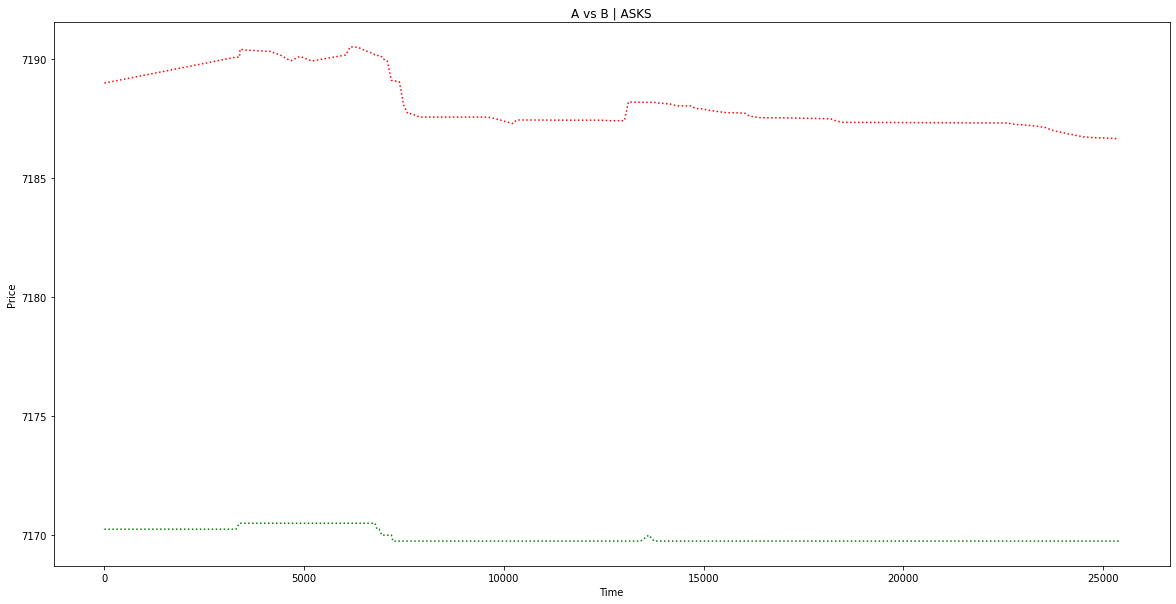

In [14]:
# A vs B | ASKS
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_asks,':r',
         timestamps, assetB_asks, ':g')
plt.title('A vs B | ASKS')
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

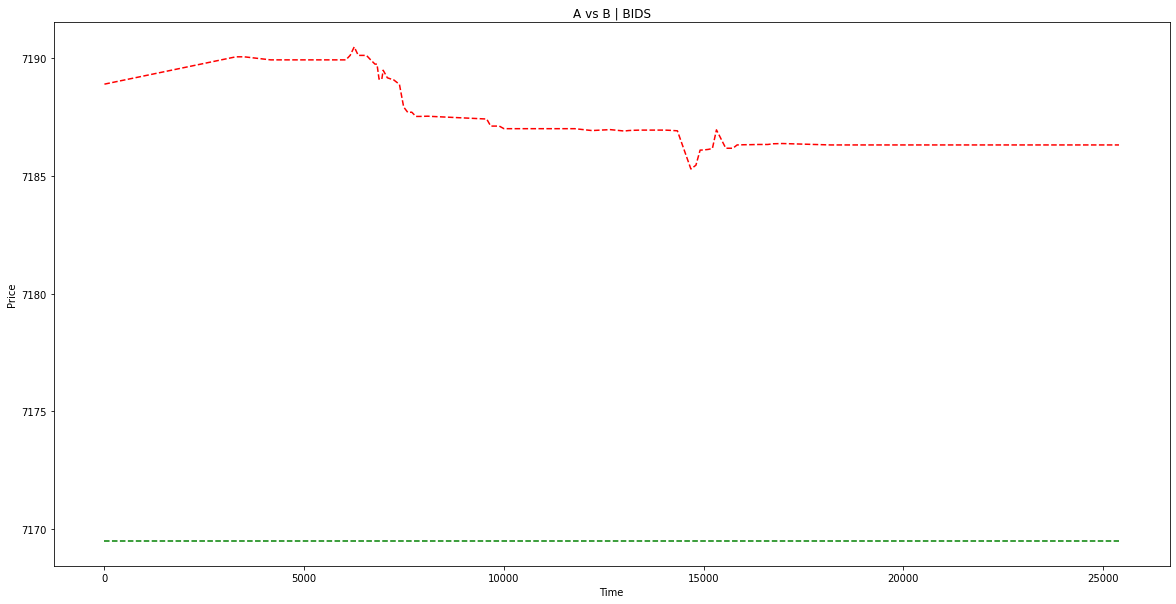

In [15]:
# A vs B | BIDS
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_bids,'--r',
         timestamps, assetB_bids, '--g')
plt.title('A vs B | BIDS')
plt.xlabel('Time')
plt.ylabel('Price')

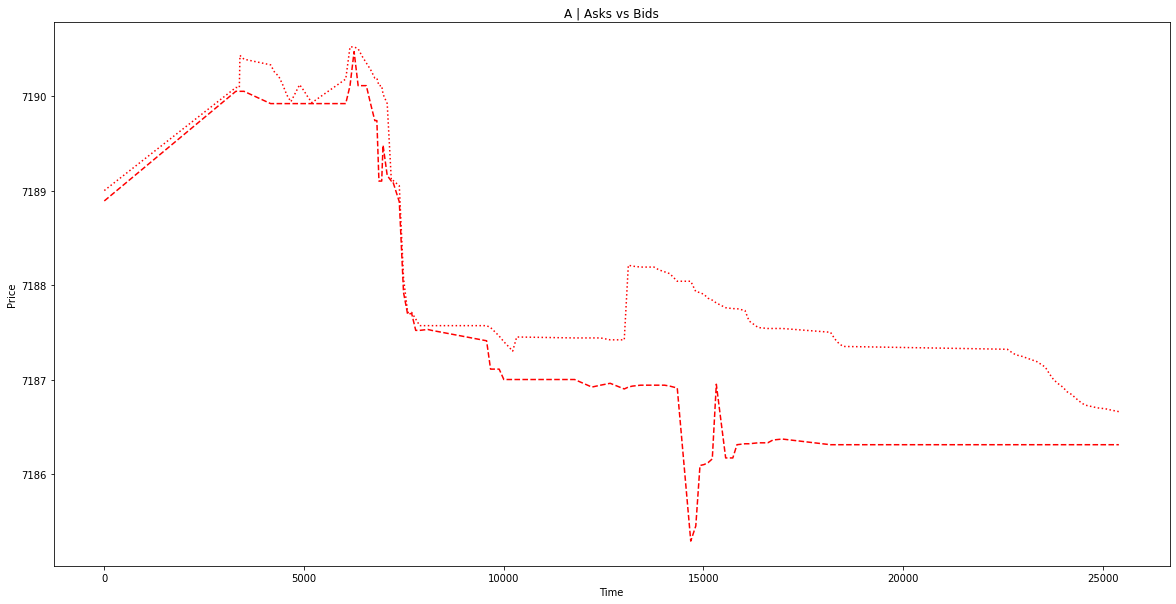

In [16]:
# A | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_asks, ':r',
         timestamps, assetA_bids, '--r')
plt.title('A | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

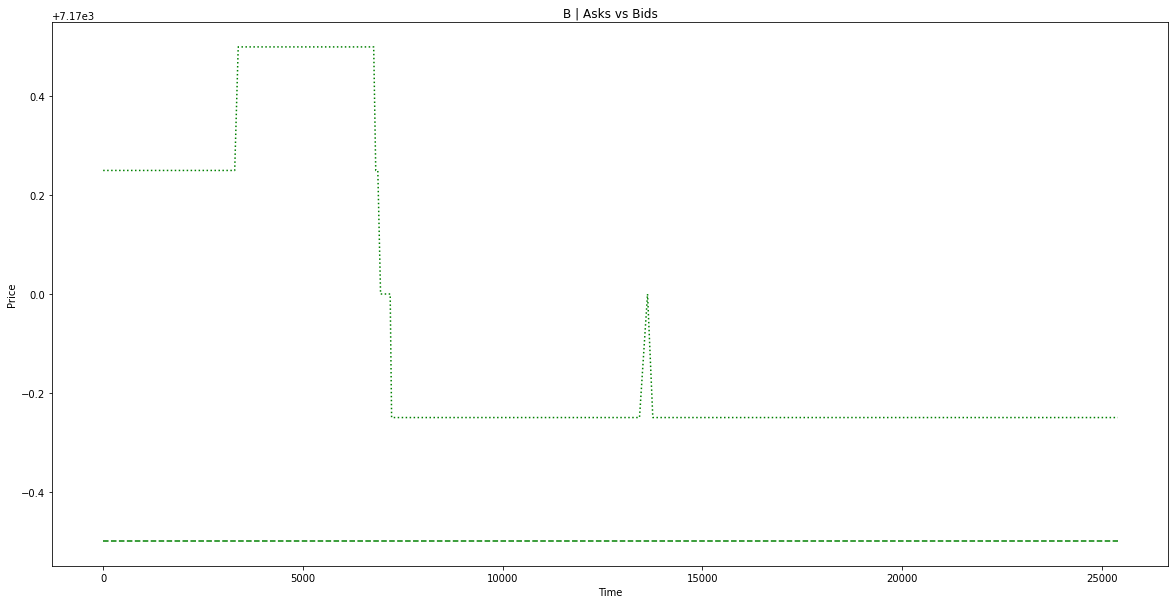

In [17]:
# B | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetB_asks, ':g',
         timestamps, assetB_bids, '--g')
plt.title('B | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()



In [111]:
# df = pd.read_json('./data-trunc.json', orient='index')
df = pd.DataFrame.from_dict(data,orient='index')

df

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807242,"{'ask': 7190.33, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807344,"{'ask': 7190.25, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807444,"{'ask': 7190.21, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807545,"{'ask': 7190.12, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807649,"{'ask': 7190.01, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"


In [19]:
def asks(state):
    ask_ = state['ask']
    return ask_
def bids(state):
    bid_ = state['bid']
    return bid_

In [112]:
assetA = df.assetA.apply([asks, bids])

,asks,bids
1577836803078,7189.00,7188.89
1577836806371,7190.09,7190.05
1577836806459,7190.09,7190.05
1577836806474,7190.43,7190.05
1577836806575,7190.39,7190.05
1577836807242,7190.33,7189.92
1577836807344,7190.25,7189.92
1577836807444,7190.21,7189.92
1577836807545,7190.12,7189.92
1577836807649,7190.01,7189.92


In [113]:
assetB = df.assetB.apply([asks, bids])

,asks,bids
1577836803078,7170.25,7169.5
1577836806371,7170.25,7169.5
1577836806459,7170.50,7169.5
1577836806474,7170.50,7169.5
1577836806575,7170.50,7169.5
1577836807242,7170.50,7169.5
1577836807344,7170.50,7169.5
1577836807444,7170.50,7169.5
1577836807545,7170.50,7169.5
1577836807649,7170.50,7169.5


In [114]:
# short term exponential moving average
short_ema = assetA.ewm(span=12,adjust=False).mean()

,asks,bids
1577836803078,7189.000000,7188.890000
1577836806371,7189.167692,7189.068462
1577836806459,7189.309586,7189.219467
1577836806474,7189.481957,7189.347242
1577836806575,7189.621656,7189.455358
1577836807242,7189.730632,7189.526842
1577836807344,7189.810535,7189.587328
1577836807444,7189.871991,7189.638508
1577836807545,7189.910146,7189.681814
1577836807649,7189.925508,7189.718458


In [115]:
# long term exponential moving average
long_ema = assetA.ewm(span=26,adjust=False).mean()

,asks,bids
1577836803078,7189.000000,7188.890000
1577836806371,7189.080741,7188.975926
1577836806459,7189.155501,7189.055487
1577836806474,7189.249908,7189.129155
1577836806575,7189.334359,7189.197365
1577836807242,7189.408110,7189.250894
1577836807344,7189.470473,7189.300457
1577836807444,7189.525252,7189.346349
1577836807545,7189.569308,7189.388842
1577836807649,7189.601952,7189.428187


In [116]:
#MACD line
macd = short_ema - long_ema

,asks,bids
1577836803078,0.000000,0.000000
1577836806371,0.086952,0.092536
1577836806459,0.154085,0.163980
1577836806474,0.232049,0.218087
1577836806575,0.287297,0.257993
1577836807242,0.322522,0.275948
1577836807344,0.340062,0.286870
1577836807444,0.346739,0.292159
1577836807545,0.340838,0.292972
1577836807649,0.323557,0.290271


In [117]:
# signal line
signal = macd.ewm(span=9, adjust=False).mean()

,asks,bids
1577836803078,0.000000,0.000000
1577836806371,0.017390,0.018507
1577836806459,0.044729,0.047602
1577836806474,0.082193,0.081699
1577836806575,0.123214,0.116958
1577836807242,0.163075,0.148756
1577836807344,0.198473,0.176379
1577836807444,0.228126,0.199535
1577836807545,0.250668,0.218222
1577836807649,0.265246,0.232632


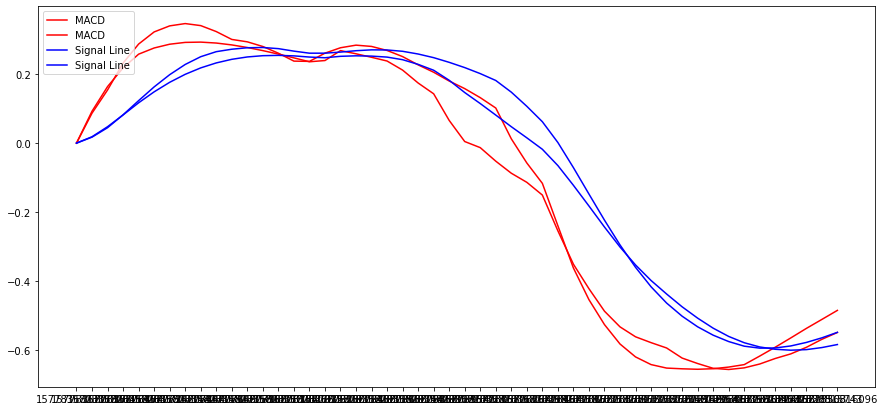

In [122]:
# plot
plt.figure(figsize=(15,7))
plt.plot(df.index, macd, label = 'MACD', color='red')
plt.plot(df.index, signal, label = 'Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()